# String Matching using 'evalign'-package

The evalign package (https://github.com/compi1234/evalign.git) is a package for string matching
using a weighted edit scheme.  

It implements a basic weighted edit distance metric, but is quite complete in its functionality:
- it knows about special operations such as compounding
- it has a large class of text normalization options
- it can treat single sentences as well as large corpora

The example exercises in this notebook largely align with the exercises in dtw1.ipynb


## WARNING:  THIS NOTEBOOK IS UNDER CONSTRUCTION 

In [2]:
try:
  import evalign
except:
  ! pip install git+https://github.com/compi1234/evalign.git

# do all the imports
%matplotlib inline

import sys, os
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import evalign as eva

### 1. Levenshtein Distance
The levenshtein() routine computes the symmetric edit distance with equal costs for Deletions, Insertions and Deletions

In [3]:
xlist = ["word","word","words"]
ylist = ["words","wods","word"]
for x,y in zip(xlist,ylist):
    lev_dist,_ = eva.levenshtein(x,y)
    print("Levenshtein Distance (%s vs %s):  %d " %(x,y,lev_dist)) 

Levenshtein Distance (word vs words):  1 
Levenshtein Distance (word vs wods):  2 
Levenshtein Distance (words vs word):  1 


In [4]:
# you can also run the routine on a corpus of examples
# the second result argument is a  structure detailing the results
eva.levenshtein(xlist,ylist)

(4,
 {'total': 4,
  'err': 30.76923076923077,
  'utterances': 3,
  'hyp_tokens': 13,
  'ref_tokens': 13})

### String Matching and Alignments

Metrics such as Levenshtein distance find the minimal edit distance.
This corresponds to the
simple Hamming distance (letter by letter) between optimally aligned versions of the two strings,
where one allows for insertion of epsilon characters in reference and test.

The  Levenhstein distance is obtained by a single forward pass through a trellis.
In order to find the alignment a 'backtracking' is required as well.
The eva.levenshtein() routine only implements the forward pass and is therefore only suitable to find the distance.
If you are interested in finding the alignment, you can use eva.align() which is a convenience wrapper around eva.edit_distance().

In [5]:
utt1 = "recognize speech"
utt2 = "wreck a nice beach"
ld,_ = eva.levenshtein(utt1,utt2)
print("Levenshtein Distance: ",ld)
al = eva.align(utt1,utt2)
print("Alignment: ",al)

Levenshtein Distance:  9
Alignment:  [('_', 'w'), ('r', 'r'), ('e', 'e'), ('c', 'c'), ('_', 'k'), ('_', ' '), ('o', 'a'), ('g', ' '), ('n', 'n'), ('i', 'i'), ('z', 'c'), ('e', 'e'), (' ', ' '), ('s', '_'), ('p', 'b'), ('e', 'e'), ('e', 'a'), ('c', 'c'), ('h', 'h')]


### 2. edit_distance()
The edit_distance() routine computes the weighted edit distance.
Normally the weighted edit distance is NOT symmetric and therefore we make explicit
the distinction between a hyp(othesis) and ref(erence).  In a trellis we show the hypothesis on the x-axis and the reference on the y-axis

If you want to see the internals (trellis and matching operations), you can specify the "Verbose" keyword

In [6]:
trace = [(0,0),(1,0),(2,1),(3,1),(4,2),(5,3),(6,4),(7,5)]

In [7]:
obs = "dyonysos"  #"d y o n y s o   s"
ref = "oteos"     #"d o t e o s "
ed,results = eva.edit_distance(x=obs,y=ref,TRELLIS=True,ALIGN=True,VERBOSE=True)
results

Weighted Edit Distance:  5.2
[[0.        1.        2.        3.        4.        5.        6.
  7.        8.       ]
 [1.        1.1       2.1       2.        3.        4.        5.
  6.        7.       ]
 [2.        2.1       2.2       3.        3.1       4.1       5.1
  6.1       7.1      ]
 [3.        3.1       3.1999998 3.3       4.1       4.2       5.2
  6.2       7.2      ]
 [4.        4.1       4.2       3.1999998 4.2       5.2       5.2999997
  5.2       6.2      ]
 [5.        5.1       5.2       4.2       4.2999997 5.2999997 5.2
  6.2       5.2      ]]
[['Q' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I']
 ['D' 'S' 'S' 'H' 'I' 'I' 'I' 'H' 'I']
 ['D' 'S' 'S' 'D' 'S' 'S' 'S' 'S' 'S']
 ['D' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S']
 ['D' 'S' 'S' 'H' 'I' 'S' 'S' 'H' 'I']
 ['D' 'S' 'S' 'D' 'S' 'S' 'H' 'I' 'H']]
Backtrace
[(1, 0), (2, 0), (3, 1), (4, 1), (5, 2), (6, 3), (7, 4), (8, 5)]
[('d', '_'), ('y', '_'), ('o', 'o'), ('n', '_'), ('y', 't'), ('s', 'e'), ('o', 'o'), ('s', 's')]
Number of Tokens (ref):  

{'total': 5,
 'sub': 2,
 'ins': 3,
 'del': 0,
 'edit_dist': 5.199999809265137,
 'err': 100.0,
 'hyp_tokens': 8,
 'ref_tokens': 5,
 'utterances': 1,
 'edits': ['I', 'I', 'H', 'I', 'S', 'S', 'H', 'H'],
 'align': [('d', '_'),
  ('y', '_'),
  ('o', 'o'),
  ('n', '_'),
  ('y', 't'),
  ('s', 'e'),
  ('o', 'o'),
  ('s', 's')],
 'trellis': array([[0.       , 1.       , 2.       , 3.       , 4.       , 5.       ],
        [1.       , 1.1      , 2.1      , 3.1      , 4.1      , 5.1      ],
        [2.       , 2.1      , 2.2      , 3.1999998, 4.2      , 5.2      ],
        [3.       , 2.       , 3.       , 3.3      , 3.1999998, 4.2      ],
        [4.       , 3.       , 3.1      , 4.1      , 4.2      , 4.2999997],
        [5.       , 4.       , 4.1      , 4.2      , 5.2      , 5.2999997],
        [6.       , 5.       , 5.1      , 5.2      , 5.2999997, 5.2      ],
        [7.       , 6.       , 6.1      , 6.2      , 5.2      , 6.2      ],
        [8.       , 7.       , 7.1      , 7.2      , 6.2   

In [8]:
display(results['align'])
trellis = pd.DataFrame(results['trellis'].T) # ,columns=list('_'+obs),index=list("_"+ref))
display(trellis)

[('d', '_'),
 ('y', '_'),
 ('o', 'o'),
 ('n', '_'),
 ('y', 't'),
 ('s', 'e'),
 ('o', 'o'),
 ('s', 's')]

,0,1,2,3,4,5,6,7,8
0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
1,1.0,1.1,2.1,2.0,3.0,4.0,5.0,6.0,7.0
2,2.0,2.1,2.2,3.0,3.1,4.1,5.1,6.1,7.1
3,3.0,3.1,3.2,3.3,4.1,4.2,5.2,6.2,7.2
4,4.0,4.1,4.2,3.2,4.2,5.2,5.3,5.2,6.2
5,5.0,5.1,5.2,4.2,4.3,5.3,5.2,6.2,5.2


In [33]:
def make_trellis_df(trellis_values,x=None,y=None,hide_root=False):
    '''
    make a DataFrame from a np array
    make both column and index multiindex style if the sequences x,y are given
    
    assuming x<->y inverted input !!
    '''
    
    if (x is None) or (y is None):
        trellis = pd.DataFrame(trellis_values.T)
    else:
        trellis_indx = [ np.arange(len(y_names)), y_names ] 
        trellis_cols = [ np.arange(len(x_names)), x_names ] 
        trellis = pd.DataFrame(trellis_values.T, index = trellis_indx, columns= trellis_cols) 
    if hide_root:
        trellis.iloc[0,0]="#"
    return(trellis)

def highlight_cells(x,cells):
    '''
    cells should be a tuple or list of tuples
    assuming x<->y inverted input
    '''

    color = 'background-color: lightgreen'
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    if not isinstance(cells,list): cells = [cells]
    for c in cells:
        #print(c[1],c[0])
        df1.iloc[c[1], c[0]] = color
    return df1                               
index_names = {
    'selector': '.index_name',
    'props': 'font-style: italic; color: darkgrey; font-weight:normal;'
}
headers = {
    'selector': 'th:not(.index_name)',
    'props': 'background-color: #006666; color: white;'
}
format_data = {
    'selector':'td',
    'props':'font-size:1.em;border: 2px solid black;min-width:2cm'}
format_clabels = {
     'selector': 'th.col_heading.level1', 
     'props': 'font-size: 1.2em'}
format_rlabels = {
     'selector': 'th.row_heading.level1', 
     'props': 'font-size: 1.2em'}

In [34]:

#trellis.style
#trellis.style.format(precision=2).applymap(color_negative_red).set_table_styles([index_names, headers])

#    .applymap(color_negative_red) \
tr_styled = trellis.style \
    .format(precision=2) \
    .set_table_styles([index_names, headers,format_data, format_clabels,format_rlabels]) 

In [35]:
trellis = make_trellis_df(results['trellis'],hide_root=True)
trellis.style\
    .apply(highlight_cells,cells=results['trace'], axis=None) \
    .format(precision=2)


,0,1,2,3,4,5,6,7,8
0,#,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00
1,1.00,1.10,2.10,2.00,3.00,4.00,5.00,6.00,7.00
2,2.00,2.10,2.20,3.00,3.10,4.10,5.10,6.10,7.10
3,3.00,3.10,3.20,3.30,4.10,4.20,5.20,6.20,7.20
4,4.00,4.10,4.20,3.20,4.20,5.20,5.30,5.20,6.20
5,5.00,5.10,5.20,4.20,4.30,5.30,5.20,6.20,5.20


In [26]:
results['trace']

[(1, 0), (2, 0), (3, 1), (4, 1), (5, 2), (6, 3), (7, 4), (8, 5)]

In [27]:
trellis_values = results['trellis'].T
y_names = list("_"+ref)
x_names = list("_"+obs)
trellis_indx = [ np.arange(len(y_names)), y_names ] 
trellis_cols = [ np.arange(len(x_names)), x_names ] 
trellis = pd.DataFrame(trellis_values, index = trellis_indx, columns= trellis_cols)
trellis

,,0,1,2,3,4,5,6,7,8
,,_,d,y,o,n,y,s,o,s
0,_,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
1,o,1.0,1.1,2.1,2.0,3.0,4.0,5.0,6.0,7.0
2,t,2.0,2.1,2.2,3.0,3.1,4.1,5.1,6.1,7.1
3,e,3.0,3.1,3.2,3.3,4.1,4.2,5.2,6.2,7.2
4,o,4.0,4.1,4.2,3.2,4.2,5.2,5.3,5.2,6.2
5,s,5.0,5.1,5.2,4.2,4.3,5.3,5.2,6.2,5.2


In [29]:


trellis.style.apply(highlight_cells,cells=results['trace'], axis=None)

0 1
0 2
1 3
1 4
2 5
3 6
4 7
5 8


,,0,1,2,3,4,5,6,7,8
,,_,d,y,o,n,y,s,o,s
0,_,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000
1,o,1.000000,1.100000,2.100000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000
2,t,2.000000,2.100000,2.200000,3.000000,3.100000,4.100000,5.100000,6.100000,7.100000
3,e,3.000000,3.100000,3.200000,3.300000,4.100000,4.200000,5.200000,6.200000,7.200000
4,o,4.000000,4.100000,4.200000,3.200000,4.200000,5.200000,5.300000,5.200000,6.200000
5,s,5.000000,5.100000,5.200000,4.200000,4.300000,5.300000,5.200000,6.200000,5.200000


In [217]:
trellis.iloc[0,0]='#'
trellis

,,0,1,2,3,4,5,6,7,8
,,_,d,y,o,n,y,s,o,s
0,_,#,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
1,d,1.0,0.0,1.0,777.0,3.0,4.0,5.0,6.0,7.0
2,o,2.0,1.0,1.1,1.0,2.0,3.0,4.0,5.0,6.0
3,t,3.0,2.0,2.1,2.0,2.1,31.0,4.1,5.1,6.1
4,e,4.0,3.0,3.1,3.0,3.1,3.2,4.2,5.2,6.2
5,o,5.0,4.0,4.1,3.1,4.1,4.2,4.3,4.2,5.2
6,s,6.0,5.0,5.1,4.1,4.2,5.2,4.2,5.2,4.2


In [31]:
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 3 else 'black'
    return 'color: %s' % color
    return 'color: red'
#pd.set_option("display.precision", 1)
index_names = {
    'selector': '.index_name',
    'props': 'font-style: italic; color: darkgrey; font-weight:normal;'
}
headers = {
    'selector': 'th:not(.index_name)',
    'props': 'background-color: #006666; color: white;'
}
format_data = {
    'selector':'td',
    'props':'font-size:1.em;border: 2px solid black;min-width:2cm'}
format_clabels = {
     'selector': 'th.col_heading.level1', 
     'props': 'font-size: 1.2em'}
format_rlabels = {
     'selector': 'th.row_heading.level1', 
     'props': 'font-size: 1.4em'}
#trellis.style
#trellis.style.format(precision=2).applymap(color_negative_red).set_table_styles([index_names, headers])

#    .applymap(color_negative_red) \
tr_styled = trellis.style \
    .format(precision=2) \
    .set_table_styles([index_names, headers,format_data, format_clabels,format_rlabels]) 
display(tr_styled)
#display(tr_styled).visualize(filename='content.png');

,0,1,2,3,4,5,6,7,8
0,#,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00
1,1.00,1.10,2.10,2.00,3.00,4.00,5.00,6.00,7.00
2,2.00,2.10,2.20,3.00,3.10,4.10,5.10,6.10,7.10
3,3.00,3.10,3.20,3.30,4.10,4.20,5.20,6.20,7.20
4,4.00,4.10,4.20,3.20,4.20,5.20,5.30,5.20,6.20
5,5.00,5.10,5.20,4.20,4.30,5.30,5.20,6.20,5.20


In [120]:
trellis.to_excel("output.xlsx",
             sheet_name='Sheet_name_1') 

ModuleNotFoundError: No module named 'openpyxl'

<AxesSubplot:xlabel='None-None', ylabel='None-None'>

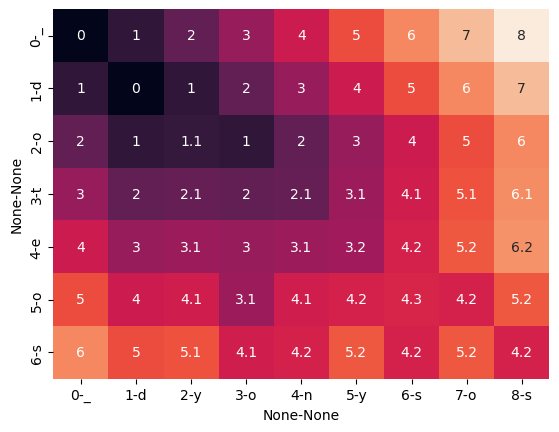

In [119]:
import seaborn as sns
sns.heatmap(trellis,annot=True,cbar=False)

In [113]:
trellis.index = pd.MultiIndex.from_arrays([list(trellis.index),list("_"+ref)],names=('', 'y'))
trellis

,,0,1,2,3,4,5,6,7,8
,y,,,,,,,,,
0,_,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
1,d,1.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0
2,o,2.0,1.0,1.1,1.0,2.0,3.0,4.0,5.0,6.0
3,t,3.0,2.0,2.1,2.0,2.1,3.1,4.1,5.1,6.1
4,e,4.0,3.0,3.1,3.0,3.1,3.2,4.2,5.2,6.2
5,o,5.0,4.0,4.1,3.1,4.1,4.2,4.3,4.2,5.2
6,s,6.0,5.0,5.1,4.1,4.2,5.2,4.2,5.2,4.2


In [106]:
list(trellis.index)

[0, 1, 2, 3, 4, 5, 6]

In [107]:
rowidx = tuple(zip(list(trellis.index),list("_"+ref)))
trellis.index = pd.MultiIndex.from_tuple

((0, '_'), (1, 'd'), (2, 'o'), (3, 't'), (4, 'e'), (5, 'o'), (6, 's'))

In [109]:
arrays = [[1, 1, 2, 2], ['red', 'blue', 'red', 'blue']]


,,0,1,2,3,4,5,6,7,8
indx_ref,label_ref,,,,,,,,,
0,_,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
1,d,1.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0
2,o,2.0,1.0,1.1,1.0,2.0,3.0,4.0,5.0,6.0
3,t,3.0,2.0,2.1,2.0,2.1,3.1,4.1,5.1,6.1
4,e,4.0,3.0,3.1,3.0,3.1,3.2,4.2,5.2,6.2
5,o,5.0,4.0,4.1,3.1,4.1,4.2,4.3,4.2,5.2
6,s,6.0,5.0,5.1,4.1,4.2,5.2,4.2,5.2,4.2


In [56]:
# Our custom styling method - this is fired once for each column (Series) of the DataFrame
def highlight_cell1(col, col_label, row_label):
   # check if col is a column we want to highlight
    if col.name == col_label:
        # a boolean mask where True represents a row we want to highlight
        mask = (col.index == row_label)
        # return an array of string styles (e.g. ["", "background-color: yellow"])
        return ["background-color: yellow" if val_bool else "" for val_bool in mask]
    else:
        # return an array of empty strings that has the same size as col (e.g. ["",""])
        return np.full_like(col, "", dtype="str")

# Our custom styling method - this is fired once for each column (Series) of the DataFrame
def highlight_cell(col, row):
   # check if col is a column we want to highlight
    if col.name == col_label:
        # a boolean mask where True represents a row we want to highlight
        mask = (col.index == row_label)
        # return an array of string styles (e.g. ["", "background-color: yellow"])
        return ["background-color: yellow" if val_bool else "" for val_bool in mask]
    else:
        # return an array of empty strings that has the same size as col (e.g. ["",""])
        return np.full_like(col, "", dtype="str")

def colour_numbers(cell_val):
    red    = 'background-color: red;'
    orange = 'background-color: orange;'     
    default = ''

    # note multiple else ..if conditions
    if cell_val > 2.:
        return red  
    else:
        return default


In [64]:
trellis.applymap(lambda x:  0 if x<2 else x+1) 

,_,d,y,o,n,y,s,o,s
_,0.0,0.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
d,0.0,0.0,0.0,3.0,4.0,5.0,6.0,7.0,8.0
o,3.0,0.0,0.0,0.0,3.0,4.0,5.0,6.0,7.0
t,4.0,3.0,3.1,3.0,3.1,4.1,5.1,6.1,7.1
e,5.0,4.0,4.1,4.0,4.1,4.2,5.2,6.2,7.2
o,6.0,5.0,5.1,4.1,5.1,5.2,5.3,5.2,6.2
s,7.0,6.0,6.1,5.1,5.2,6.2,5.2,6.2,5.2


In [ ]:
sd

In [81]:
trellis.style

,_,d,y,o,n,y,s,o,s
_,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000
d,1.000000,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000
o,2.000000,1.000000,1.100000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000
t,3.000000,2.000000,2.100000,2.000000,2.100000,3.100000,4.100000,5.100000,6.100000
e,4.000000,3.000000,3.100000,3.000000,3.100000,3.200000,4.200000,5.200000,6.200000
o,5.000000,4.000000,4.100000,3.100000,4.100000,4.200000,4.300000,4.200000,5.200000
s,6.000000,5.000000,5.100000,4.100000,4.200000,5.200000,4.200000,5.200000,4.200000


In [94]:
trellis.style.format(precision=3).set_properties(**{'color':'red'})

,0,1,2,3,4,5,6,7,8
0,0.000,1.000,2.000,3.000,4.000,5.000,6.000,7.000,8.000
1,1.000,0.000,1.000,2.000,3.000,4.000,5.000,6.000,7.000
2,2.000,1.000,1.100,1.000,2.000,3.000,4.000,5.000,6.000
3,3.000,2.000,2.100,2.000,2.100,3.100,4.100,5.100,6.100
4,4.000,3.000,3.100,3.000,3.100,3.200,4.200,5.200,6.200
5,5.000,4.000,4.100,3.100,4.100,4.200,4.300,4.200,5.200
6,6.000,5.000,5.100,4.100,4.200,5.200,4.200,5.200,4.200


In [84]:

def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 3 else 'black'
    return 'color: %s' % color
    return 'color: red'
trellis.style.apply(color_negative_red)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [57]:
for x,y in results['align']:
    print(x,y)
    trellis.style.apply(highlight_cell, col_label=x, row_label=y,axis=0)

d d
y _
o o
n _
y t
s e
o o
s s


In [58]:
trellis.style.applymap(colour_numbers,1)

KeyError: "None of [Int64Index([1], dtype='int64')] are in the [index]"

In [40]:
display(trellis)

,_,d,y,o,n,y,s,o,s
_,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
d,1.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0
o,2.0,1.0,1.1,1.0,2.0,3.0,4.0,5.0,6.0
t,3.0,2.0,2.1,2.0,2.1,3.1,4.1,5.1,6.1
e,4.0,3.0,3.1,3.0,3.1,3.2,4.2,5.2,6.2
o,5.0,4.0,4.1,3.1,4.1,4.2,4.3,4.2,5.2
s,6.0,5.0,5.1,4.1,4.2,5.2,4.2,5.2,4.2


### Edit distance for scoring the output of a speech recognizer

The edit_distance() routine can perfectly be used to score the output of a speech recognizer
against a given reference.  
We define a simple helper routine to score a number of sentence:
- tokenize (split a textual reference/input into words for the DTW routine)
- run the dtw.edit_distance() module
- aggregate the results over the corpus

In [ ]:
def score_corpus(corpus, Verbose = False, Display = True):
    Nsub = 0
    Nins = 0
    Ndel = 0
    Ntot = 0
    for [reference,result] in corpus:
        ref = dtw.tokenizer(reference)
        hyp = dtw.tokenizer(result)
        _, align, cts, _ = dtw.edit_distance(hyp,ref)
        
        if(Verbose):
            print("Input(reference):",ref)
            print("Output(test):    ",hyp)
            display(align)
        
        Nsub += cts[0]
        Nins += cts[1]
        Ndel += cts[2]
        Ntot += cts[3]

    print("\n ++ CORPUS RESULTS ++ ")
    print("\n#S=%d, #I=%d, #D=%d for %d tokens" % (Nsub,Nins,Ndel,Ntot) )
    print("Error Rate: %5.2f%%" % (100.*(Nsub+Nins+Ndel)/Ntot)  )

In [ ]:
ref1="fauchelevent limped along behind the horse in a very contented frame of mind "
obs1 = "lochleven limped along behind the heard in very contented frame of mind"

ref2= " he would have loved to be king in such a non nonsense paradise "
obs2=" he had loved the king in a no sense paradigm"

ref3 = "do you know the names of the seven dwarfs in Disney’s Snow White movie ?"
obs3 =  "do you know the names of the seven warfs in the sneaze now white movie ?"
d2,_,cts2,_ = dtw.edit_distance(x=obs2.split(), y=ref2.split())
d3,_,cts3,_ = dtw.edit_distance(x=obs3.split(), y=ref3.split())
d1,_,cts1,_ = dtw.edit_distance(x=obs1.split(), y=ref1.split())
print("Sentence by Sentence Results")
print(d1,d2,d3)
print(cts1,cts2,cts3)

In [ ]:
# corpus scoring routine
corpus = [ [ref1,obs1], [ref2,obs2], [ref3,obs3] ]
score_corpus(corpus, Verbose = True)